In [22]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from collections import Counter
import seaborn as sns
import plotly.express as px


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [19]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [15]:
downloaded = drive.CreateFile({'id':"13lYbzuitboiC_uJ7NN5HGP0Iewpci-Sz"})   # replace the id with id of file you want to access
downloaded.GetContentFile('lspace_df.csv')        # replace the file name with your file
downloaded = drive.CreateFile({'id':"12CZhz2gDjnAx7-th6a7O7p4MU-Sfj7yA"})   # replace the id with id of file you want to access
downloaded.GetContentFile('pspace_df.csv')
downloaded = drive.CreateFile({'id':"1OdHSbfgqArDWMzpitVi0qBBfYxN8qBI8"})   # replace the id with id of file you want to access
downloaded.GetContentFile('cspace_df.csv')
downloaded = drive.CreateFile({'id':"11GZ-iU5PaEW8vbQ16u9njOqFsCCyhpGU"})   # replace the id with id of file you want to access
downloaded.GetContentFile('random_df.csv')

In [43]:
cities = ['adelaide', 'antofagasta', 'athens', 'belfast', 'berlin', 'bordeaux', 'brisbane', 'canberra',
              'detroit', 'dublin', 'grenoble', 'helsinki', 'kuopio', 'lisbon', 'luxembourg', 'melbourne',
              'nantes', 'palermo', 'paris', 'prague', 'rennes', 'rome', 'sydney', 'toulouse', 'turku',
              'venice', 'winnipeg']

In [47]:
 colors = ['Aqua', 'Black', 'Blue','BlueViolet','Brown','Chartreuse',
              'Chocolate','Crimson','DarkCyan','DarkGreen','DarkRed','DeepPink'
              ,'DodgerBlue','ForestGreen','Gold','Indigo','Lime','Magenta',
              'Olive', 'OrangeRed','Purple','Red','Salmon', 'SpringGreen',
              'Teal','Tomato','Violet']

In [16]:
lspace_df = pd.read_csv('lspace_df.csv',encoding='utf-8',delimiter=",")   
pspace_df =  pd.read_csv('pspace_df.csv',encoding='utf-8',delimiter=",") 
cspace_df =  pd.read_csv('cspace_df.csv',encoding='utf-8',delimiter=",") 
random_df = pd.read_csv('random_df.csv',encoding='utf-8',delimiter=",")  

In [40]:
fig = px.scatter_3d(['lspace','pspace','cspace'],x=lspace_df['degree'], y=pspace_df['degree'], z=cspace_df['degree'])
fig.show()

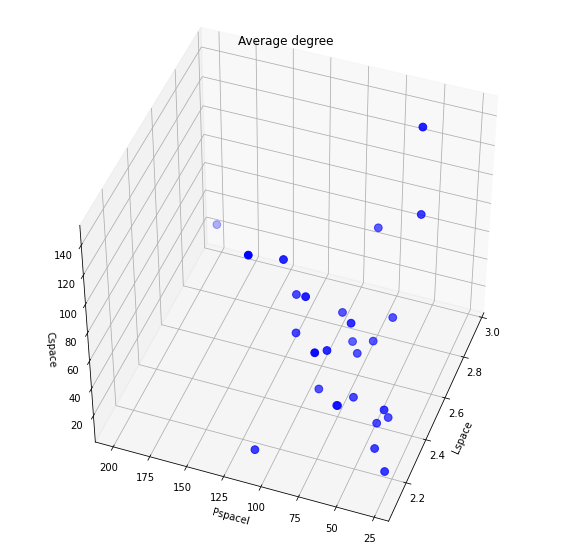

In [69]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(lspace_df['degree'], pspace_df['degree'], cspace_df['degree'],
            c = 'b', s=60)
ax.azim = 200
ax.elev = 45
ax.set_xlabel('Lspace')
ax.set_ylabel('Pspacel')
ax.set_zlabel('Cspace')
ax.set_title('Average degree')
plt.show()


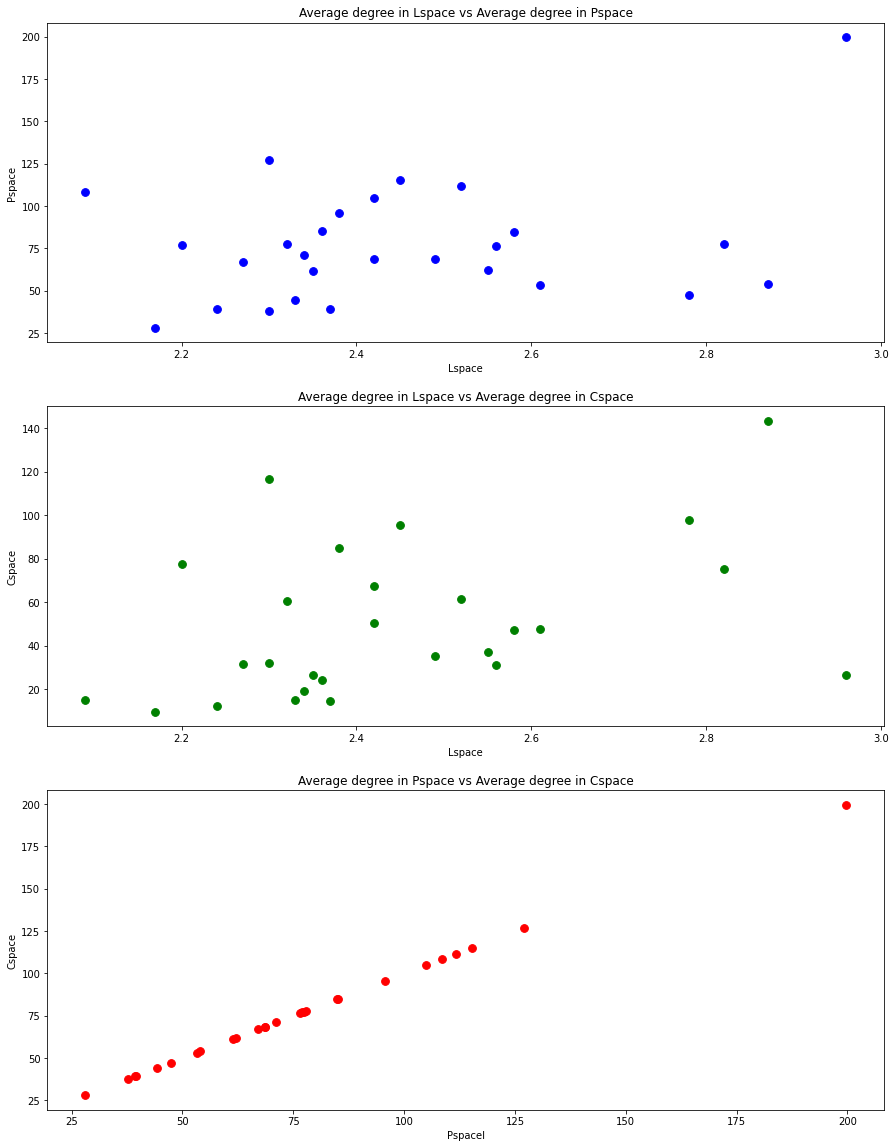

In [84]:
fig,ax = plt.subplots(3, 1, figsize=(15, 20)) 
ax[0].scatter(lspace_df['degree'], pspace_df['degree'],
            c = 'b', s=60)
ax[0].set_xlabel('Lspace')
ax[0].set_ylabel('Pspace')
ax[0].set_title('Average degree in Lspace vs Average degree in Pspace')

ax[1].scatter(lspace_df['degree'], cspace_df['degree'],
            c = 'g', s=60)
ax[1].set_xlabel('Lspace')
ax[1].set_ylabel('Cspace')
ax[1].set_title('Average degree in Lspace vs Average degree in Cspace')
ax[2].scatter(pspace_df['degree'], pspace_df['degree'],
            c = 'r', s=60)
ax[2].set_xlabel('Pspacel')
ax[2].set_ylabel('Cspace')
ax[2].set_title('Average degree in Pspace vs Average degree in Cspace')
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler
features = ['nodes','edges','clustering','degree','shortest path','assortativity']
l = lspace_df.loc[:, features].values
l = StandardScaler().fit_transform(l)
l_t = l.T
cov_l = np.cov(l_t)
eig_vals_l,eig_vecs_l = np.linalg.eig(cov_l)
print('Eigenvalues %s'%eig_vals_l)
print('Eigenvalues ratio %s'% np.divide(eig_vals_l[0],sum(eig_vals_l)))
projected_l = l.dot(eig_vecs_l.T[0])

Eigenvalues [3.07431454e+00 1.81494292e+00 8.55547653e-01 3.65157138e-01
 1.06722482e-03 1.19739756e-01]
Eigenvalues ratio 0.4934085059101832


In [76]:
p = lspace_df.loc[:, features].values
p = StandardScaler().fit_transform(p)
p_t = p.T
cov_p = np.cov(p_t)
eig_vals_p,eig_vecs_p = np.linalg.eig(cov_p)
print('Eigenvalues %s'%eig_vals_p)
print('Eigenvalues ratio %s'% np.divide(eig_vals_p[0],sum(eig_vals_p)))
projected_p = p.dot(eig_vecs_p.T[0])

Eigenvalues [3.07431454e+00 1.81494292e+00 8.55547653e-01 3.65157138e-01
 1.06722482e-03 1.19739756e-01]
Eigenvalues ratio 0.4934085059101832


In [77]:
c = lspace_df.loc[:, features].values
c = StandardScaler().fit_transform(c)
c_t = c.T
cov_c = np.cov(c_t)
eig_vals_c,eig_vecs_c = np.linalg.eig(cov_c)
print('Eigenvalues %s'%eig_vals_c)
print('Eigenvalues ratio %s'% np.divide(eig_vals_c[0],sum(eig_vals_c)))
projected_c = c.dot(eig_vecs_c.T[0])


Eigenvalues [3.07431454e+00 1.81494292e+00 8.55547653e-01 3.65157138e-01
 1.06722482e-03 1.19739756e-01]
Eigenvalues ratio 0.4934085059101832


In [79]:
r = random_df.loc[:, features].values
r = StandardScaler().fit_transform(r)
r_t = r.T
cov_r = np.cov(r_t)
eig_vals_r,eig_vecs_r = np.linalg.eig(cov_r)
print('Eigenvalues %s'%eig_vals_r)
print('Eigenvalues ratio %s'% np.divide(eig_vals_r[0],sum(eig_vals_r)))
projected_r = r.dot(eig_vecs_r.T[0])


Eigenvalues [3.14735767e+00 1.42613847e+00 1.23396171e+00 1.16043307e-03
 2.41697875e-01 1.80453076e-01]
Eigenvalues ratio 0.5051314773809653


Text(0, 0.5, 'PC random graph')

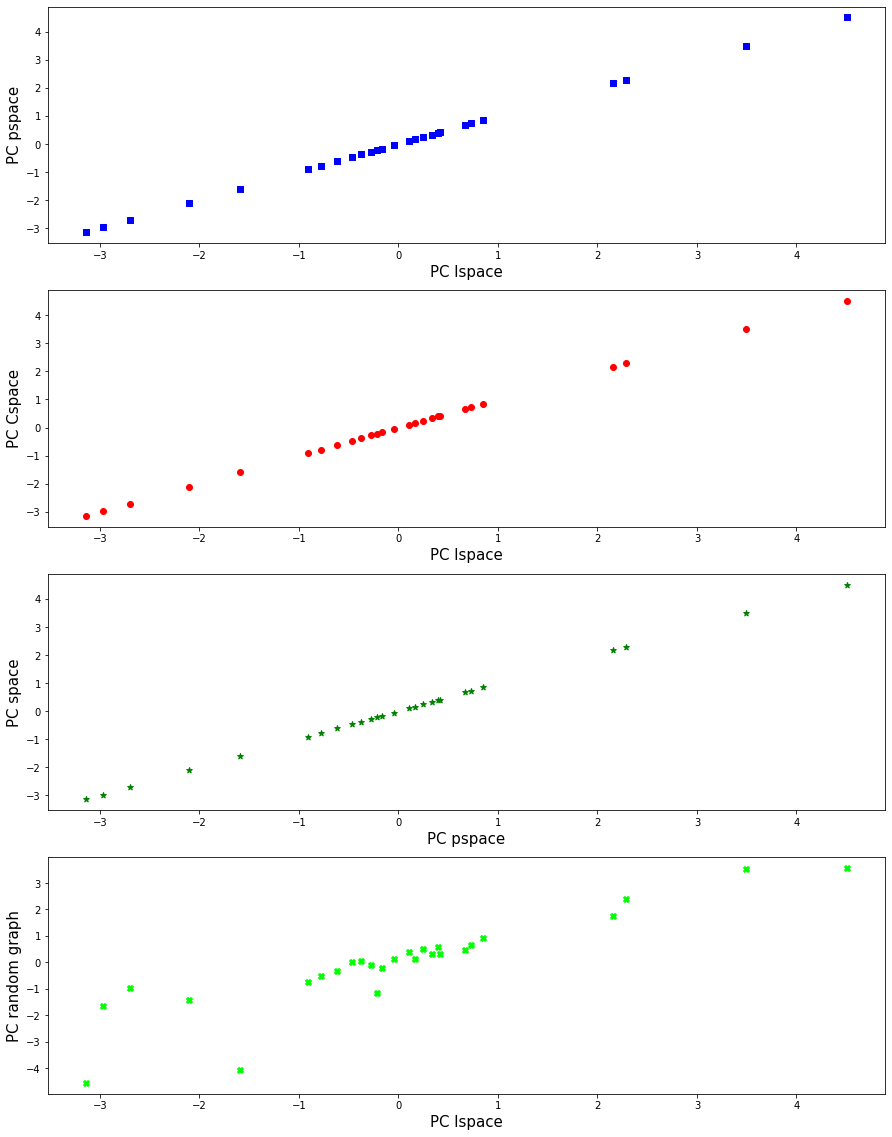

In [81]:
fig,ax = plt.subplots(4, 1,figsize=(15,20))
ax = ax.flatten()

ax[0].scatter(projected_l,projected_p, c='b', marker="s")
ax[1].scatter(projected_l,projected_c,c='r', marker="o")
ax[2].scatter(projected_p,projected_c, c='g', marker="*")
ax[3].scatter(projected_l,projected_r,c='Lime', marker="X")

ax[0].set_xlabel('PC lspace', fontsize = 15)
ax[0].set_ylabel('PC pspace', fontsize = 15)  

ax[1].set_xlabel('PC lspace', fontsize = 15)
ax[1].set_ylabel('PC Cspace', fontsize = 15)


ax[2].set_xlabel('PC pspace', fontsize = 15)
ax[2].set_ylabel('PC space', fontsize = 15)

ax[3].set_xlabel('PC lspace', fontsize = 15)
ax[3].set_ylabel('PC random graph', fontsize = 15)  



In [82]:
fig = px.scatter_3d(['lspace','pspace','cspace'],x=lspace_df['shortest path'], y=pspace_df['shortest path'], z=cspace_df['shortest path'])
fig.show()

In [83]:
fig = px.scatter_3d(['lspace','pspace','cspace'],x=lspace_df['clustering'], y=pspace_df['clustering'], z=cspace_df['clustering'])
fig.show()